# CALCUL DES STATS RAPPORT SLL - SECTION H

# Quels sont les champs du SLL concernés par le calcule des stats `dépot de malles` (collectivités) ?

* [x] H101 : Ecoles
* [ ] H120 et H121 : Centres de loisir (ALSH)
* [ ] H122 et H123 : Services de la petite enfance (Crèches)
* [ ] H307 : Autres
* [ ] H501 : Action hors les murs
* [ ] H710 : Petite enfance (Crèches)

# H1 - Écoles (Collectivités

> Pour les malles à destination des crèches, j'ai le tableau de Laëtitia Carré qui recence les capacités d'accueil. Lors de notre dernière entrevue, on avait convenu d'appeler ces crèches pour connaître en 2023 le nombre total d'adhérents. Donc pour connaître la population touchée par malles crèches = action_a_destination_de_etablissement * nombre_inscrits_etablissement

> Il faudra aligner les noms d'établissement du tabeau de Laetitia C.(effectif_crèches) ainsi que le tableau de Maeva (liste_actions_creche) pour faire les mêmes calculs que pour les Malles écoles.

**compte-rendu réunion du 13 mars 2024 avec Laetitia Carré**
> Vu avec Laetitia C. Pour connaître l'effectif des établissements petite enfance, se baser sur la capacité d'accueil max. Une classe moyenne = 25 élèves. La liste des établissements PE a été mise à jour en 2021. Se baser dessus pour compter la population touchée par les malles PE. 
> => Population touchée = SOMME(capacité d'accueil de chaque structure présente dans la liste de Laetitia C.)

In [202]:
import pandas as pd
import numpy as np

# 2e version

In [203]:
filepath = "/home/kibini/kibini2/data/formulaire_sll_sept_2023-24.xlsx"

# Création d'un objet Excel
file = pd.ExcelFile(filepath)

In [204]:
# On définit la liste des noms de feuilles à garder
sheets2keep = ['Bruno',
                'Céline',
                'Esther',
                'Gwen',
                'Hélène',
                'Inès',
                'Laetitia C.',
                'Laetitia D',
                'Zina']

In [205]:
# import des données dans un dataframe
df = pd.read_excel(file,sheets2keep)
df

/home/kibini/miniconda3/envs/kibini/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


{'Bruno':    Date début action      Date fin action          Champ d'action  \
 0         2024-10-04  2023-10-18 00:00:00   dont Livre et lecture   
 1         2024-10-13  2023-05-24 00:00:00               Education   
 2         2024-10-13  2023-05-24 00:00:00               Education   
 3         2024-10-20  2023-05-23 00:00:00               Education   
 4         2024-10-20  2023-05-23 00:00:00               Education   
 5         2024-11-09  2023-11-09 00:00:00               Education   
 6         2024-11-17          17/11/20223   dont Livre et lecture   
 7         2024-12-07  2023-12-15 00:00:00               Education   
 8         2024-12-14  2024-02-25 00:00:00   dont Livre et lecture   
 9         2024-11-08  2024-12-13 00:00:00   dont Livre et lecture   
 10        2024-01-10  2024-02-21 00:00:00   dont Livre et lecture   
 11        2023-12-11  2024-02-02 00:00:00               Education   
 12        2024-02-01  2024-03-29 00:00:00   dont Livre et lecture   
 13        

In [206]:
df = pd.concat(df)
df

Date début action      Date fin action  \
Bruno      0    2024-10-04 00:00:00  2023-10-18 00:00:00   
           1    2024-10-13 00:00:00  2023-05-24 00:00:00   
           2    2024-10-13 00:00:00  2023-05-24 00:00:00   
           3    2024-10-20 00:00:00  2023-05-23 00:00:00   
           4    2024-10-20 00:00:00  2023-05-23 00:00:00   
...                             ...                  ...   
Laetitia D 971  2024-06-19 00:00:00  2025-02-09 00:00:00   
           972  2024-06-19 00:00:00  2025-02-09 00:00:00   
           973  2024-06-19 00:00:00  2025-02-09 00:00:00   
           974                  NaT                  NaT   
           975  2024-06-25 00:00:00  2024-07-30 00:00:00   

                        Champ d'action  \
Bruno      0     dont Livre et lecture   
           1                 Education   
           2                 Education   
           3                 Education   
           4                 Education   
...                                ...   
Laetitia D 971                     NaN   
           972                     NaN   
           973                     NaN   
           974                     NaN   
           975                     NaN   

                                                    Type d'action  \
Bruno      0    Projet, accompagnement de projet / accueil ave...   
           1                                    Classe patrimoine   
           2                                    Classe patrimoine   
           3                                    Classe patrimoine   
           4                                    Classe patrimoine   
...                                                           ...   
Laetitia D 971                                                NaN   
           972                                                NaN   
           973                                                NaN   
           974                                                NaN   
           975                                                NaN   

                         Nom action ou projet           Lieu  \
Bruno      0    Turgotins passeurs d'histoire  Dans les murs   
           1                Classe patrimoine  Dans les murs   
           2                Classe patrimoine  Dans les murs   
           3                Classe patrimoine  Dans les murs   
           4                Classe patrimoine  Dans les murs   
...                                       ...            ...   
Laetitia D 971                    MARMOTHEQUE  Hors les murs   
           972                    MARMOTHEQUE  Hors les murs   
           973                    MARMOTHEQUE  Hors les murs   
           974                            NaN            NaN   
           975                         Malles  Hors les murs   

               Espace (si hors les murs et pas dans la structure partenaire  \
Bruno      0                                                  NaN             
           1                                                  NaN             
           2                                                  NaN             
           3                                                  NaN             
           4                                                  NaN             
...                                                           ...             
Laetitia D 971                                                NaN             
           972                                                NaN             
           973                                                NaN             
           974                                                NaN             
           975                                                NaN             

                             Type de public Niveau si école  \
Bruno      0        Adolescents (12-18 ans)             2de   
           1    Enfant Scolaires (3-12 ans)             CM1   
           2    Enfant Scolaires (3-12 ans)             

In [207]:
# Remise à plat du dataframe
df = df.reset_index()

In [208]:
#Suppression index inutile
df.drop(labels='level_1',axis='columns',inplace=True)

# Renommage de l'index
df.rename(columns={'level_0':'nom_feuille'},inplace=True)

### TRAITEMENT DES DONNÉES DE LAETITIA D

* Sélectionner sa feuille
* Pour chaque structure compter Nb de prêts malles et ou BCD
    * Si Total BCD > 1 : nb personnes touchées = effectif Maternelles de l'école
    * Si Total Malles > 1 : nb personnestouchées = effectif Primaires
    * Si total Malles + total BCD < 1 : nb personnes touchées = nb d'emprunteurs distincts x 25 (effectif moyen pour une classe)

In [209]:
# Filtre Malles Collectivités
df_coll = df[df["nom_feuille"]=='Laetitia D']

In [210]:
# Sélection des structures écoles

# Liste des noms d'école
school_names = df_coll[df_coll["Structure"]=='Ecole']["Nom d'équipement"].unique()

In [211]:
for name in school_names:
    # On définit un df qui filtre à partir de l'itération school_name
    df_coll_school = df_coll[df_coll["Nom d'équipement"]==name]
    # On calcule un total par types d'actions malles
    Total_actions_BCD = len(df_coll_school[df_coll_school['Nom action ou projet']=='BCD'])
    Total_actions_MARM = len(df_coll_school[df_coll_school['Nom action ou projet']=='MARMOTHEQUE'])
    Total_emprunteurs_distincts = df_coll_school['Nom emprunteur'].nunique()
    
    # On insère dans le dataframe de base les colonnes du dataframe par école
    df_coll.loc[df_coll["Nom d'équipement"]==name,['Total_actions_BCD']] = Total_actions_BCD
    df_coll.loc[df_coll["Nom d'équipement"]==name,['Total_actions_MARM']] = Total_actions_MARM
    df_coll.loc[df_coll["Nom d'équipement"]==name,['Total_emprunteurs_distincts']] = Total_emprunteurs_distincts

In [212]:
df_coll.columns

Index(['nom_feuille', 'Date début action', 'Date fin action', 'Champ d'action',
       'Type d'action', 'Nom action ou projet', 'Lieu',
       'Espace (si hors les murs et pas dans la structure partenaire',
       'Type de public', 'Niveau si école', 'Type d'équipement', 'Structure',
       'Nom d'équipement', 'Nom du porteur de l'action',
       'Nb de classes touchées si public scolaire', 'Nb enfants touchés',
       'Nb adultes touchés', 'Nb d'accueil ou séance', 'Notes',
       'Code de malle', 'Titre de malle', 'Nom emprunteur', 'Nombre de docs',
       'Colonne1', 'Total_actions_BCD', 'Total_actions_MARM',
       'Total_emprunteurs_distincts'],
      dtype='object')

In [213]:
# Calcule des publics touchés

effectif_moyen_classe = 25


# Si au moins 1 action MARM : Compter l'effectif Total Maternlle
df_coll.loc[df_coll['Total_actions_MARM']>0,['Nb enfants touchés']] = "Effectif maternel école concernée"

# Si au moins 1 action BCD : Compter l'effectif total Ecole
df_coll.loc[df_coll['Total_actions_BCD']>0,['Nb enfants touchés']] = "Effectif Total école concernée"

# Aucune action MARM ou BCD : Estimation = Nb emprunteurs distincts x Moyenne d'une classe
df_coll.loc[(df_coll['Total_actions_MARM']==0)&
            (df_coll['Total_actions_BCD']==0),['Nb enfants touchés']] = df_coll['Total_emprunteurs_distincts'] * effectif_moyen_classe

df_coll[["Nom d'équipement","Total_actions_MARM","Total_actions_BCD","Nb enfants touchés"]]

,Nom d'équipement,Total_actions_MARM,Total_actions_BCD,Nb enfants touchés
386,Anatole France,0.0,0.0,125.0
387,Jules Guesde,0.0,0.0,200.0
388,Jules Guesde,0.0,0.0,200.0
389,Jules Guesde,0.0,0.0,200.0
390,Jules Guesde,0.0,0.0,200.0
...,...,...,...,...
1357,MA L'île aux enfants_CHR,NaN,NaN,NaN
1358,HG Les p'tits moulins_CS Assia Djebar,NaN,NaN,NaN
1359,Graal,NaN,NaN,NaN
1360,NaN,NaN,NaN,NaN


In [214]:
# Suppression des noms doublons pour les noms d'école
df_coll.drop_duplicates(subset="Nom d'équipement",inplace=True)

/tmp/ipykernel_31882/3275219590.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_coll.drop_duplicates(subset="Nom d'équipement",inplace=True)


In [216]:
df_coll[df_coll["Structure"]=="Ecole"][["Nom d'équipement","Nb enfants touchés"]]

,Nom d'équipement,Nb enfants touchés
386,Anatole France,125.0
387,Jules Guesde,200.0
393,Léo Lagrange,75.0
395,Pierre Brossolette,75.0
397,Léon Jouhaux,Effectif Total école concernée
399,Lavoisier,Effectif Total école concernée
408,Jean Macé,Effectif Total école concernée
417,Marie Auxiliatrice,100.0
421,Michelet,Effectif Total école concernée
431,Pierre de Ronsard niv.2,50.0


In [217]:
for i in df_coll["Nom d'équipement"]:
    print(i)

Anatole France
Jules Guesde
Léo Lagrange
Pierre Brossolette
Léon Jouhaux
Lavoisier
Jean Macé
Marie Auxiliatrice
Michelet
Pierre de Ronsard niv.2
Montesquieu
Notre Dame de Lourdes
Boileau / Pasteur
Pierre de Roubaix
Sainte Bernadette
Saint Jean Baptiste
Edouard Vaillant
nan
Paul Bert - Edgar Quinet
Buffon
Albert Camus
Jules Ferry
Alphonse Daudet
Léon Gambetta
Blaise Pascal
Ernest Renan
Albert Samain
Saint François d'Assise
Paul Valéry
Elsa Triolet
Institut Turgot
Simone Veil - Niveau 2
Simone Veil - Niveau 1
François Villon
Lucie Aubrac
Condorcet
Jeanne d'Arc
La Cordée
Lakanal
Ernest Legouvé
Ernest Legouvé 2
Linné
Littré
Léon Marlot
Charles Perrault
Edmond Rostand
Sainte Marie
Jules Verne
Henri Carette
Crèche Montesquieu_Ville
George Sand
Pierre de Ronsard niv.1
Mère Térèsa
MA Les Pataponts_Temps de vie
Crèche OVH kid's
Montaigne
Voltaire
Pouponnière Boucicaud_CCAS
IEM La Marelle_Anaji
Crèche familiale_Ville
PMI_Cassel
MA Les Diablotins_Home des Flandres
MA Kamali'i
LAEP La Passerelle_C

# 1ERE VERSION

In [105]:
formulaire_collectivites_2023 = pd.read_excel("/home/kibini/kibini2/data_lucas/preparation_sll/Formulaire collectivités_22-23_verif.xlsx")

In [106]:
formulaire_collectivites_2023.columns

Index(['Type de malle', 'Titre', 'Structure', 'Emprunteur', 'Date de prêt',
       'Date de retour', 'Nbre  docs.', 'Unnamed: 7', 'Unnamed: 8',
       'Type de prêt', 'Noms à normaliser', 'Noms normalisés validés'],
      dtype='object')

In [107]:
# On créer une liste des colonnes utiles pour le calcule des statistiques
colonnes2keep_col = ['Noms normalisés validés',
                     'Type de malle',
                     'Structure',
                     'Emprunteur',
                     'Date de prêt',
                     ]

In [108]:
actions_collectivites_2023 = formulaire_collectivites_2023[colonnes2keep_col]

In [109]:
# On crée 2 colonnes de comptage des actions spéciales (MARM & BCD)

actions_collectivites_2023.loc[actions_collectivites_2023['Type de malle']=='MARM',['nb_action_marmotheque']] = 1
actions_collectivites_2023.loc[actions_collectivites_2023['Type de malle']=='BCD',['nb_action_bcd']] = 1

In [110]:
actions_collectivites_2023

,Noms normalisés validés,Type de malle,Structure,Emprunteur,Date de prêt,nb_action_marmotheque,nb_action_bcd
0,Simone Veil,C7,VEIL,LEPEZ Coralie,2022-11-10,NaN,NaN
1,Pierre de Roubaix,6 BIS,De ROUBAIX,VANMARCKE Sophie,2022-09-06,NaN,NaN
2,IEM La Marelle_Anaji,K5,La Marelle,Anaëlle,2023-04-05,NaN,NaN
3,Léo Lagrange,21,LAGRANGE,TOURNEL Claire,2022-09-06,NaN,NaN
4,Léo Lagrange,Dépôt,LAGRANGE,CADEZ Marlène,2022-09-06,NaN,NaN
...,...,...,...,...,...,...,...
543,Voltaire,4,VOLTAIRE,DARCHEVILLE Lindsay,2023-05-04,NaN,NaN
544,Voltaire,42,VOLTAIRE,ANCKAERT Céline,2023-05-04,NaN,NaN
545,Voltaire,Dépôt,VOLTAIRE,ANCKAERT Céline,2023-05-04,NaN,NaN
546,Voltaire,F2,VOLTAIRE,HOELLE Emilie,2023-05-04,NaN,NaN


In [8]:
verif_action = pd.pivot_table(data=actions_collectivites_2023,
               index='Noms normalisés validés',
               values=['nb_action_marmotheque','nb_action_bcd'],
               aggfunc=sum
              )

In [9]:
verif_action_renomme = verif_action.rename(columns={'nb_action_bcd':'nb_action_bcd_total_annee',
                                                    'nb_action_marmotheque':'nb_action_marmotheque_total_annee'
                                                   })

In [10]:
actions_collectivites_2023 = actions_collectivites_2023.merge(verif_action_renomme,
                                                              left_on='Noms normalisés validés',
                                                              right_on='Noms normalisés validés',
                                                              how= "left")

In [11]:
# Emprunteur distincts
emprunteurs_distincts = actions_collectivites_2023.groupby(['Noms normalisés validés'])['Emprunteur'].nunique().to_frame()

In [12]:
emprunteurs_distincts = emprunteurs_distincts.rename(columns={'Emprunteur':'nb_emprunteurs_distincts'})

In [13]:
emprunteurs_distincts

,nb_emprunteurs_distincts
Noms normalisés validés,
ALSH_3/5_Villon,1
Albert Camus,1
Blaise Pascal,4
Boileau / Pasteur,9
Edmond Rostand,3
Edouard Vaillant,1
Elsa Triolet,3
Ernest Legouvé,6
Ernest Renan,5


In [14]:
actions_collectivites_2023

,Noms normalisés validés,Type de malle,Structure,Emprunteur,Date de prêt,nb_action_marmotheque,nb_action_bcd,nb_action_bcd_total_annee,nb_action_marmotheque_total_annee
0,Simone Veil,C7,VEIL,LEPEZ Coralie,2022-11-10,NaN,NaN,0.0,0.0
1,Pierre de Roubaix,6 BIS,De ROUBAIX,VANMARCKE Sophie,2022-09-06,NaN,NaN,0.0,0.0
2,IEM La Marelle_Anaji,K5,La Marelle,Anaëlle,2023-04-05,NaN,NaN,0.0,0.0
3,Léo Lagrange,21,LAGRANGE,TOURNEL Claire,2022-09-06,NaN,NaN,0.0,0.0
4,Léo Lagrange,Dépôt,LAGRANGE,CADEZ Marlène,2022-09-06,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...
543,Voltaire,4,VOLTAIRE,DARCHEVILLE Lindsay,2023-05-04,NaN,NaN,1.0,1.0
544,Voltaire,42,VOLTAIRE,ANCKAERT Céline,2023-05-04,NaN,NaN,1.0,1.0
545,Voltaire,Dépôt,VOLTAIRE,ANCKAERT Céline,2023-05-04,NaN,NaN,1.0,1.0
546,Voltaire,F2,VOLTAIRE,HOELLE Emilie,2023-05-04,NaN,NaN,1.0,1.0


In [15]:
actions_collectivites_2023 = actions_collectivites_2023.merge(emprunteurs_distincts,
                                                              left_on='Noms normalisés validés',
                                                              right_on='Noms normalisés validés',
                                                              how='left'
                                                             )

In [16]:
actions_collectivites_2023

,Noms normalisés validés,Type de malle,Structure,Emprunteur,Date de prêt,nb_action_marmotheque,nb_action_bcd,nb_action_bcd_total_annee,nb_action_marmotheque_total_annee,nb_emprunteurs_distincts
0,Simone Veil,C7,VEIL,LEPEZ Coralie,2022-11-10,NaN,NaN,0.0,0.0,3.0
1,Pierre de Roubaix,6 BIS,De ROUBAIX,VANMARCKE Sophie,2022-09-06,NaN,NaN,0.0,0.0,1.0
2,IEM La Marelle_Anaji,K5,La Marelle,Anaëlle,2023-04-05,NaN,NaN,0.0,0.0,1.0
3,Léo Lagrange,21,LAGRANGE,TOURNEL Claire,2022-09-06,NaN,NaN,0.0,0.0,3.0
4,Léo Lagrange,Dépôt,LAGRANGE,CADEZ Marlène,2022-09-06,NaN,NaN,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...
543,Voltaire,4,VOLTAIRE,DARCHEVILLE Lindsay,2023-05-04,NaN,NaN,1.0,1.0,3.0
544,Voltaire,42,VOLTAIRE,ANCKAERT Céline,2023-05-04,NaN,NaN,1.0,1.0,3.0
545,Voltaire,Dépôt,VOLTAIRE,ANCKAERT Céline,2023-05-04,NaN,NaN,1.0,1.0,3.0
546,Voltaire,F2,VOLTAIRE,HOELLE Emilie,2023-05-04,NaN,NaN,1.0,1.0,3.0


## VERIFS

* [ ] vérifier à l'aide du tableau de Agnès que les écoles touchés par les marmothèques et les bdc sont bien les mêmes pour continuer dnas la suite du script


* [ ] Si ok, modifier le script ci-dessus et ajouter une colonne `touché par au moins une action marm?` ou `touché par au mois une action BCD ?` qui contient la valeur boolééenne `vrai`ou `faux`

> Ces deux nouvelles colonnes mentionnées dans le point ci-dessus permettront de faire le calcule de la population touchée.

# EFFECTIFS SCOLAIRES

In [17]:
effectifs_ecoles_publiques_2023 = pd.read_excel("../data_lucas/preparation_sll/collectivites/Tableau Effectifs Ecoles publiques 2022-2023 rapport SLL.xlsx")

/home/kibini/miniconda3/envs/kibini/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


In [18]:
# Affichage du tableau des effectifs écoles publiques
effectifs_ecoles_publiques_2023

,LIEU,Noms normalisés validés,TPS,PS,MS,GS,CP,CE1,CE2,CM1,CM2,PASS,DIRE,Total
0,ALBERT CAMUS ELE.,Albert Camus,0,0,0,0,70,66,65,79,59,0,0,339
1,CONDORCET ELE.,Albert Samain,0,0,0,0,22,30,22,33,33,0,0,140
2,DIRE ELE.,NaN,0,0,0,0,0,0,0,0,0,0,11,11
3,EDOUARD VAILLANT ELE.,Edouard Vaillant,0,0,0,0,19,23,22,25,19,0,0,108
4,EMILE LITTRE ELE.,Littré,0,0,0,0,26,32,39,37,30,0,0,164
5,ERNEST RENAN ELE.,Ernest Renan,0,0,0,0,39,45,48,45,49,0,0,226
6,JEAN MACE ELE.,Jean Macé,0,0,0,0,49,52,48,46,47,0,0,242
7,LAKANAL ELE.,Lakanal,0,0,0,0,36,19,30,27,22,0,0,134
8,LAVOISIER ELE.,Lavoisier,0,0,0,0,54,55,56,49,46,0,0,260
9,LEON JOUHAUX ELE.,Léon Jouhaux,0,0,0,0,16,25,24,24,23,0,0,112


Dans le cas de certains établissement, l'information de l'effectif pour les maternelles et les primaires est réparties dans deux lignes portant un libelé identique. On additionne donc ces lignes pour obtenir : 1 ligne = 1 établissement.

In [19]:
effectifs_ecoles_publiques_2023 = effectifs_ecoles_publiques_2023.pivot_table(index='Noms normalisés validés',
                                                                              values = ['TPS','PS','MS','GS','CP','CE1','CE2','CM1','CM2','PASS','DIRE'],
                                                                              aggfunc=sum
                                                                             )

In [20]:
# Création deux colonnes supplémentaires : colonne['total_maternelle'] et colonne['total_primaire']
# Colonne maternel = somme des colonnes TPS PS MS GS
# Colonne total_primaire = somme des colonnes CP CE1 CE2 CM1 CM2

In [21]:
# On crée des filtres pour les catégories MATERNELLE ET PRIMAIRE
liste_maternelle = ['TPS','PS','MS','GS']
liste_primaire = ['CP','CE1','CE2','CM1','CM2']

In [22]:
# On crée 2 colonnes total qui font la somme des effectifs 'maternelle' & 'primaire'
effectifs_ecoles_publiques_2023['effectif_total_maternelle'] = effectifs_ecoles_publiques_2023[liste_maternelle].sum(axis=1)
effectifs_ecoles_publiques_2023['effectif_total_primaire'] = effectifs_ecoles_publiques_2023[liste_primaire].sum(axis=1)

In [23]:
# On ne garde que les colonnes "Total"
effectifs_ecoles_publiques_2023 = effectifs_ecoles_publiques_2023[['effectif_total_maternelle','effectif_total_primaire']]

## Calcul effectif - écoles privées

In [24]:
effectif_ecoles_privees_2023 = pd.read_excel(
    "/home/kibini/kibini2/data_lucas/preparation_sll/collectivites/Tableau Effectifs Ecoles privées 2022-2023.xlsx")

In [25]:
# On fait un pivot pour avoir les Noms d'école en index, et les effectifs en colonne

effectif_ecoles_privees_2023 = effectif_ecoles_privees_2023.pivot_table(index='Noms normalisés validés',
                                                            values=['effectif_total_maternelle','effectif_total_primaire'],
                                                            aggfunc=sum
                                                           )

In [26]:
effectif_ecoles_privees_2023

,effectif_total_maternelle,effectif_total_primaire
Noms normalisés validés,,
Charles De Foucauld,30,45
Jeanne d'Arc,210,432
La Cordée,20,93
Marie Auxiliatrice,120,230
Mère Térèsa,61,130
Notre Dame de Lourdes,50,101
Saint Augustin,60,111
Saint Eloi,40,78
Saint François d'Assise,114,175


## Effectifs écoles publiques + effectifs écoles privées

In [27]:
effectif_ecoles_total = pd.concat([effectif_ecoles_privees_2023,effectifs_ecoles_publiques_2023])

In [28]:
effectif_ecoles_total

,effectif_total_maternelle,effectif_total_primaire
Noms normalisés validés,,
Charles De Foucauld,30,45
Jeanne d'Arc,210,432
La Cordée,20,93
Marie Auxiliatrice,120,230
Mère Térèsa,61,130
Notre Dame de Lourdes,50,101
Saint Augustin,60,111
Saint Eloi,40,78
Saint François d'Assise,114,175


In [29]:
#effectif_ecoles_total.to_excel('../data_lucas/preparation_sll/collectivites/verif_effectif_ecoles_total.xlsx')

In [30]:
# Faire un merge sur le premier tableau 

In [31]:
# Créer un dataframe qui contient uniquement les deux colonnes de total (primaire et secondaire)

## Création d'un tableau de synthèse collectivités

In [32]:
actions_collectivites_2023 = actions_collectivites_2023.merge(effectif_ecoles_total,
                                                              right_on='Noms normalisés validés',
                                                              left_on='Noms normalisés validés',
                                                              how='left'
                                                             )

In [33]:
actions_collectivites_2023

,Noms normalisés validés,Type de malle,Structure,Emprunteur,Date de prêt,nb_action_marmotheque,nb_action_bcd,nb_action_bcd_total_annee,nb_action_marmotheque_total_annee,nb_emprunteurs_distincts,effectif_total_maternelle,effectif_total_primaire
0,Simone Veil,C7,VEIL,LEPEZ Coralie,2022-11-10,NaN,NaN,0.0,0.0,3.0,0,241
1,Pierre de Roubaix,6 BIS,De ROUBAIX,VANMARCKE Sophie,2022-09-06,NaN,NaN,0.0,0.0,1.0,0,138
2,IEM La Marelle_Anaji,K5,La Marelle,Anaëlle,2023-04-05,NaN,NaN,0.0,0.0,1.0,NaN,NaN
3,Léo Lagrange,21,LAGRANGE,TOURNEL Claire,2022-09-06,NaN,NaN,0.0,0.0,3.0,75,186
4,Léo Lagrange,Dépôt,LAGRANGE,CADEZ Marlène,2022-09-06,NaN,NaN,0.0,0.0,3.0,75,186
...,...,...,...,...,...,...,...,...,...,...,...,...
569,Voltaire,4,VOLTAIRE,DARCHEVILLE Lindsay,2023-05-04,NaN,NaN,1.0,1.0,3.0,120,192
570,Voltaire,42,VOLTAIRE,ANCKAERT Céline,2023-05-04,NaN,NaN,1.0,1.0,3.0,120,192
571,Voltaire,Dépôt,VOLTAIRE,ANCKAERT Céline,2023-05-04,NaN,NaN,1.0,1.0,3.0,120,192
572,Voltaire,F2,VOLTAIRE,HOELLE Emilie,2023-05-04,NaN,NaN,1.0,1.0,3.0,120,192


In [34]:
# Listing des colonnes
actions_collectivites_2023.columns

Index(['Noms normalisés validés', 'Type de malle', 'Structure', 'Emprunteur',
       'Date de prêt', 'nb_action_marmotheque', 'nb_action_bcd',
       'nb_action_bcd_total_annee', 'nb_action_marmotheque_total_annee',
       'nb_emprunteurs_distincts', 'effectif_total_maternelle',
       'effectif_total_primaire'],
      dtype='object')

In [35]:
colonnes2keep = ['nb_action_bcd_total_annee',
                 'nb_action_marmotheque_total_annee',
                 'nb_emprunteurs_distincts',
                 'effectif_total_maternelle',
                 'effectif_total_primaire']

In [36]:
pd.pivot_table(data=actions_collectivites_2023,
               index='Noms normalisés validés',
               values = colonnes2keep,
              )

,nb_action_bcd_total_annee,nb_action_marmotheque_total_annee,nb_emprunteurs_distincts
Noms normalisés validés,,,
ALSH_3/5_Villon,0.0,0.0,1.0
Albert Camus,0.0,0.0,1.0
Blaise Pascal,0.0,0.0,4.0
Boileau / Pasteur,0.0,1.0,9.0
Edmond Rostand,0.0,0.0,3.0
Edouard Vaillant,1.0,1.0,1.0
Elsa Triolet,1.0,2.0,3.0
Ernest Legouvé,0.0,0.0,6.0
Ernest Renan,1.0,1.0,5.0


In [37]:
actions_collectivites_2023['population_touchee'] = np.NaN

In [38]:
actions_collectivites_2023

,Noms normalisés validés,Type de malle,Structure,Emprunteur,Date de prêt,nb_action_marmotheque,nb_action_bcd,nb_action_bcd_total_annee,nb_action_marmotheque_total_annee,nb_emprunteurs_distincts,effectif_total_maternelle,effectif_total_primaire,population_touchee
0,Simone Veil,C7,VEIL,LEPEZ Coralie,2022-11-10,NaN,NaN,0.0,0.0,3.0,0,241,NaN
1,Pierre de Roubaix,6 BIS,De ROUBAIX,VANMARCKE Sophie,2022-09-06,NaN,NaN,0.0,0.0,1.0,0,138,NaN
2,IEM La Marelle_Anaji,K5,La Marelle,Anaëlle,2023-04-05,NaN,NaN,0.0,0.0,1.0,NaN,NaN,NaN
3,Léo Lagrange,21,LAGRANGE,TOURNEL Claire,2022-09-06,NaN,NaN,0.0,0.0,3.0,75,186,NaN
4,Léo Lagrange,Dépôt,LAGRANGE,CADEZ Marlène,2022-09-06,NaN,NaN,0.0,0.0,3.0,75,186,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
569,Voltaire,4,VOLTAIRE,DARCHEVILLE Lindsay,2023-05-04,NaN,NaN,1.0,1.0,3.0,120,192,NaN
570,Voltaire,42,VOLTAIRE,ANCKAERT Céline,2023-05-04,NaN,NaN,1.0,1.0,3.0,120,192,NaN
571,Voltaire,Dépôt,VOLTAIRE,ANCKAERT Céline,2023-05-04,NaN,NaN,1.0,1.0,3.0,120,192,NaN
572,Voltaire,F2,VOLTAIRE,HOELLE Emilie,2023-05-04,NaN,NaN,1.0,1.0,3.0,120,192,NaN


In [39]:
effectif_moyen_classe = 25

In [40]:
# Si la structure n'a était touchée ni par BCD ni par Marmothèque...
#... Population touchée = Nombre emprunteur distinct x le nombre moyen d'élève par classe

actions_collectivites_2023.loc[(actions_collectivites_2023['nb_action_bcd_total_annee']==0) & 
                               (actions_collectivites_2023['nb_action_marmotheque_total_annee']==0),
                               ['population_touchee']] = actions_collectivites_2023['nb_emprunteurs_distincts'] * effectif_moyen_classe

In [41]:
# Si la structure a été touchée par au moins une malle marmothèque...
#...Population touchée = Effectif total maternelle

actions_collectivites_2023.loc[actions_collectivites_2023['nb_action_marmotheque_total_annee']>=1,
                              ['population_touchee']] = actions_collectivites_2023['effectif_total_maternelle']

In [42]:
# Si la structure a été touchée par au moins une malle BCD...
#...Population touchée = Effectif total primaire

actions_collectivites_2023.loc[actions_collectivites_2023['nb_action_bcd_total_annee']>=1,
                              ['population_touchee']] = actions_collectivites_2023['population_touchee'] + actions_collectivites_2023['effectif_total_primaire']

In [43]:
population_touchee_par_malles_collectivites_ecole = pd.pivot_table(data=actions_collectivites_2023,
                                                                   index='Noms normalisés validés',
                                                                   values='population_touchee')

In [44]:
classes_touchees_par_malles_collectivites_ecole = pd.pivot_table(data=actions_collectivites_2023,
                                                                 index='Noms normalisés validés',
                                                                 values='nb_emprunteurs_distincts')

In [45]:
total_population_touchees_par_malles_collectivites_ecole = population_touchee_par_malles_collectivites_ecole['population_touchee'].sum().astype(int)

In [46]:
total_classes_touchees_collectivites_ecoles = classes_touchees_par_malles_collectivites_ecole.sum()

In [47]:
total_malles_collectivites_ecole = len(actions_collectivites_2023)

In [48]:
print(f'Population touchée par les malles prêtées aux écoles = {total_population_touchees_par_malles_collectivites_ecole} personnes')

Population touchée par les malles prêtées aux écoles = 4444 personnes


# H7 - Malles en direction des PE

In [49]:
tableau_effectifs_PE = pd.read_excel("../data_lucas/preparation_sll/collectivites/tableaux_acteurs_petite_enfance_maj_2021.xlsx")

In [50]:
tableau_effectifs_PE['capacite_accueil'] = tableau_effectifs_PE['capacite_accueil'].fillna(0)

In [51]:
# Nombre d'équipements renseignés multiplié par deux
total_malles_collectivites_PE = len(tableau_effectifs_PE)*2
total_malles_collectivites_PE

126

In [52]:
# Si tous les établissements dans le tableau ont été touchés par les prêts de malles Collectivités alors
# Population touchée = la somme des capacités d'accueil de chaque structure bénéficiant du service de prêt de malle : 

total_population_touchee_par_malles_collectivites_PE = tableau_effectifs_PE['capacite_accueil'].sum()

# MÉTHODE CALCUL

* Vérifier que tous les formulaires ont des noms de colonne identiques
* (Vérifier que les collègues comprennent bien le sens des colonnes)
* Récupérer les tableaux de chaque collègue
* Importer les tableaux dans pandas puis concaténer les dataframes en un tableau unique
* Effectuer les différentes requêtes

In [53]:
# Import de la fonction WARNING pour alléger l'affichage
import warnings
warnings.filterwarnings("ignore")

In [54]:
formulaire_bruno_23 = pd.read_excel('..//data_lucas/preparation_sll/autres_formulaires/Formulaire_22-23_Bruno.xlsx')
formulaire_celine_23 = pd.read_excel('..//data_lucas/preparation_sll/autres_formulaires/Formulaire_22-23_Céline.xlsx')
formulaire_chantal_23 = pd.read_excel('..//data_lucas/preparation_sll/autres_formulaires/Formulaire_22-23_Chantal.xlsx')
formulaire_esther_23 = pd.read_excel('..//data_lucas/preparation_sll/autres_formulaires/Formulaire_22-23_Esther.xlsx')
formulaire_gaelle_23 = pd.read_excel('..//data_lucas/preparation_sll/autres_formulaires/Formulaire_22-23_Gaëlle.xlsx')
formulaire_gwen_23 = pd.read_excel('..//data_lucas/preparation_sll/autres_formulaires/Formulaire_22-23_Gwen.xlsx')
formulaire_laetitia_23 = pd.read_excel('..//data_lucas/preparation_sll/autres_formulaires/Formulaire_22-23_Laetitia.xlsx')
formulaire_louise_23 = pd.read_excel('..//data_lucas/preparation_sll/autres_formulaires/Formulaire_22-23_Louise.xlsx')
formulaire_pascale_23 = pd.read_excel('..//data_lucas/preparation_sll/autres_formulaires/Formulaire_22-23_Pascale.xlsx')
formulaire_peggy_23 = pd.read_excel('..//data_lucas/preparation_sll/autres_formulaires/Formulaire_22-23_Peggy.xlsx')

In [55]:
# On ajoute le nom du référent si celuiè-ci n'est pas renseigné (pour chaque DataFrame)

formulaire_bruno_23['Nom référent bib']= formulaire_bruno_23['Nom référent bib'].fillna('Bruno')
formulaire_celine_23['Nom référent bib']= formulaire_celine_23['Nom référent bib'].fillna('Céline')
formulaire_chantal_23['Nom référent bib']= formulaire_chantal_23['Nom référent bib'].fillna('Chantal')
formulaire_esther_23['Nom référent bib']= formulaire_esther_23['Nom référent bib'].fillna('Esther')
formulaire_gaelle_23['Nom référent bib']= formulaire_gaelle_23['Nom référent bib'].fillna('Gaelle')
formulaire_gwen_23['Nom référent bib']= formulaire_gwen_23['Nom référent bib'].fillna('Gwendoline')
formulaire_laetitia_23['Nom référent bib']= formulaire_laetitia_23['Nom référent bib'].fillna('Laetitia')
formulaire_louise_23['Nom référent bib']= formulaire_louise_23['Nom référent bib'].fillna('Louise')
formulaire_pascale_23['Nom référent bib']= formulaire_pascale_23['Nom référent bib'].fillna('Pascale')
formulaire_peggy_23['Nom référent bib']= formulaire_peggy_23['Nom référent bib'].fillna('Peggy')

In [56]:
liste_formulaires = [formulaire_bruno_23,
                     formulaire_celine_23,
                     formulaire_chantal_23,
                     formulaire_esther_23,
                     formulaire_gaelle_23,
                     formulaire_gwen_23,
                     formulaire_laetitia_23,
                     formulaire_louise_23,
                     formulaire_pascale_23,
                     formulaire_peggy_23
                    ]

In [57]:
# On crée un dataframe contenant les lignes de chaque formulaires
tableau_synthese = pd.concat(liste_formulaires,
                             ignore_index=True)

In [58]:
tableau_synthese

,Date début action,Date fin action,Champ d'action,Type action,Nom action ou projet,Lieu,Espace (si hors les murs et pas dans la struct. Partenaire),Public visé,Classe d'âge pour les scolaires,Type équipement et/ou partenaire visé,...,Nom référent bib,Nb classe,Nb enfants touchés,Nb adultes touchés,Total population touchée,Nb de séances,Notes,Type équipement si scolaire 2,Nom équipementm,Espace (si hors les murs)
0,2022-10-01 00:00:00,2023-01-01 00:00:00,dont Livre et lecture,Animation lecture,Chut on lit,Dans les murs,NaN,Adolescents (12-18 ans),4ème,Etablissements scolaires et universitaires,...,Bruno,5.0,100.0,10.0,110,1,En collaborations avec 16 collègues,NaN,NaN,NaN
1,2022-10-01 00:00:00,2023-01-01 00:00:00,dont Livre et lecture,Animation lecture,Chut on lit,Dans les murs,NaN,Adolescents (12-18 ans),4ème,Etablissements scolaires et universitaires,...,Bruno,6.0,120.0,12.0,132,1,En collaborations avec 16 collègues,NaN,NaN,NaN
2,2022-10-01 00:00:00,2023-04-01 00:00:00,Education,Accueil de classe (accompagné),Classe patrimoine,Dans les murs,NaN,Scolaires (3-12 ans),CM1,Etablissements scolaires et universitaires,...,Bruno,1.0,18.0,5.0,23,6,collaboration Sylviane,NaN,NaN,NaN
3,2022-10-01 00:00:00,2023-04-01 00:00:00,Education,Accueil de classe (accompagné),Classe patrimoine,Dans les murs,NaN,Scolaires (3-12 ans),CM1,Etablissements scolaires et universitaires,...,Bruno,1.0,21.0,5.0,26,6,collaboration Sylviane,NaN,NaN,NaN
4,2022-10-01 00:00:00,2023-04-01 00:00:00,Education,Accueil de classe (accompagné),Classe patrimoine,Dans les murs,NaN,Scolaires (3-12 ans),CM2,Etablissements scolaires et universitaires,...,Bruno,1.0,17.0,5.0,22,6,collaboration Sylviane,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,2022-11-01 00:00:00,2023-06-01 00:00:00,Education,Aide aux devoirs/soutien scolaire,NaN,Dans les murs,NaN,Scolaires (3-12 ans),NaN,NaN,...,Pascale,0.0,492.0,0.0,492,58,nb ne correspond pas à des enfants distincts :...,NaN,NaN,NaN
241,NaN,NaN,NaN,NaN,dépôt EHPAD,Hors les murs,NaN,Public captif de la structure partenaire,NaN,Maisons de retraite,...,Peggy,0.0,0.0,13.0,13,1,NaN,NaN,NaN,NaN
242,NaN,NaN,NaN,NaN,dépôt EHPAD,Hors les murs,NaN,Public captif de la structure partenaire,NaN,Maisons de retraite,...,Peggy,0.0,0.0,13.0,13,1,NaN,NaN,NaN,NaN
243,NaN,NaN,NaN,NaN,dépôt EHPAD,Hors les murs,NaN,Public captif de la structure partenaire,NaN,Maisons de retraite,...,Peggy,0.0,0.0,11.0,11,1,NaN,NaN,NaN,NaN


In [59]:
colonnes_to_int = ['Nb classe','Nb enfants touchés','Nb adultes touchés','Total population touchée','Nb de séances']

In [60]:
tableau_synthese[colonnes_to_int] = tableau_synthese[colonnes_to_int].fillna(0).astype(int)

In [61]:
tableau_synthese.dtypes

Date début action                                               object
Date fin action                                                 object
Champ d'action                                                  object
Type action                                                     object
Nom action ou projet                                            object
Lieu                                                            object
Espace (si hors les murs et pas dans la struct. Partenaire)    float64
Public visé                                                     object
Classe d'âge pour les scolaires                                 object
Type équipement et/ou partenaire visé                           object
Type équipement si scolaire                                     object
Nom équipement                                                  object
Nom référent bib                                                object
Nb classe                                                        int64
Nb enf

# Vérification des données renseignées

# H1 - Partenariat avec des institutions

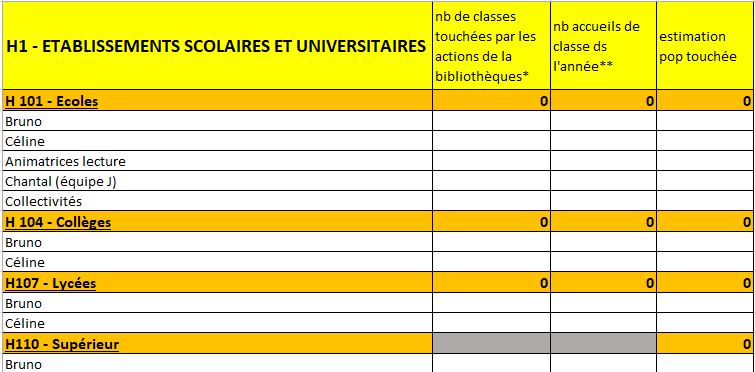

> \* on ne compte pas le nb de passages de classes ds les locaux de la bib mais le nb de classes touchées par les actions de la bib

> \** on compte chaque passage

In [62]:
tableau_synthese[tableau_synthese['Lieu']=="Dans les murs"].pivot_table(index='Type équipement si scolaire',
                                                                        values=['Nb classe','Total population touchée','Nb de séances'],
                                                                        aggfunc=sum)

,Nb classe,Nb de séances,Total population touchée
Type équipement si scolaire,,,
Collège,20,12,466
Ecole maternelle,22,22,534
Ecole élémentaire,118,145,2272
Ens supérieur et apprentissage,1,2,50
Groupe scolaire,1,2,28
Lycée,1,6,39


In [63]:
tableau_synthese.pivot_table(index="Type équipement et/ou partenaire visé",
                             values="Total population touchée",
                             aggfunc=sum
                            )

,Total population touchée
Type équipement et/ou partenaire visé,
ALSH,89
Association,126
Autres,8
Enseignements,2593
Etablissements scolaires et universitaires,1029
Maisons de retraite,40
Petite Enfance,93
Services de l'emploi/formation/insertion,15
Services de la Petite Enfance,774


# H3 - Structures associatives

In [64]:
# Filtre pour garder les Associations uniquement
tableau_synthese_assos = tableau_synthese[tableau_synthese["Type équipement et/ou partenaire visé"]=="Association"]

In [65]:
tableau_synthese_assos.groupby("Champ d'action")['Total population touchée'].sum()

Champ d'action
Action sociale         54
Culture                41
Emploi formation       18
Inclusion numérique    13
Name: Total population touchée, dtype: int64

In [66]:
tableau_synthese_assos[tableau_synthese_assos["Champ d'action"].isin(["Culture"," dont Livre et lecture"])]['Total population touchée'].sum()

41

In [67]:
tableau_synthese_assos[tableau_synthese_assos["Champ d'action"]==" dont Livre et lecture"]["Total population touchée"].sum()

0

In [68]:
tableau_synthese_assos[~tableau_synthese_assos["Champ d'action"].isin(["Culture"," dont Livre et lecture"])]['Total population touchée'].sum()

85

# H5 - Actions hors de l'établissement

In [69]:
total_actions_hlm_med = tableau_synthese[tableau_synthese['Lieu']=='Hors les murs']['Nb de séances'].sum()

In [70]:
total_actions_hors_les_murs = total_actions_hlm_med + total_malles_collectivites_PE + total_malles_collectivites_ecole

In [71]:
total_actions_hors_les_murs

773

In [72]:
total_population_touchee_hlm_med = tableau_synthese[tableau_synthese['Lieu']=='Hors les murs']['Total population touchée'].sum()

In [73]:
total_population_touchee_hors_les_murs = total_population_touchee_hlm_med + total_population_touchees_par_malles_collectivites_ecole + total_population_touchee_par_malles_collectivites_PE
total_population_touchee_hors_les_murs

6252.0

# H7 - Actions et services à destination de publics à besoin spécifiques

In [74]:
tableau_synthese.columns

Index(['Date début action', 'Date fin action ', 'Champ d'action',
       'Type action', 'Nom action ou projet', 'Lieu',
       'Espace (si hors les murs et pas dans la struct. Partenaire)',
       'Public visé', 'Classe d'âge pour les scolaires',
       'Type équipement et/ou partenaire visé', 'Type équipement si scolaire',
       'Nom équipement', 'Nom référent bib', 'Nb classe', 'Nb enfants touchés',
       'Nb adultes touchés', 'Total population touchée', 'Nb de séances',
       'Notes', 'Type équipement si scolaire 2', 'Nom équipementm',
       'Espace (si hors les murs)'],
      dtype='object')

In [75]:
tableau_synthese.groupby('Public visé')['Nb de séances'].sum()

Public visé
Adolescents (12-18 ans)                      26
Etudiants, apprentis                          5
Personnes âgées                               4
Petite enfance                              113
Populations allophones                       14
Public captif de la structure partenaire     45
Scolaires (3-12 ans)                        235
Tout public                                  29
Name: Nb de séances, dtype: int64

In [76]:
tableau_synthese.groupby('Public visé')['Total population touchée'].sum()

Public visé
Adolescents (12-18 ans)                      692
Etudiants, apprentis                         120
Personnes âgées                               42
Petite enfance                               924
Populations allophones                       146
Public captif de la structure partenaire     485
Scolaires (3-12 ans)                        3344
Tout public                                  162
Name: Total population touchée, dtype: int64